<a href="https://colab.research.google.com/github/polina-minaeva/heart-disease-ensemble/blob/main/9_%D0%90%D0%BD%D1%81%D0%B0%D0%BC%D0%B1%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Получение и загрузка данных

In [ ]:
import pandas as pd

In [ ]:
data_pd = pd.read_csv('heart.csv')
data_pd

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


ChestPainType - тип боли в груди

RestingBP - давление в состоянии покоя

Cholesterol - холестирин

FastingBS - изменение уровня сахара в крови

RestingECG - ЭКГ в состоянии покоя

MaxHR - максимальная частота пульса

ExerciseAngina - есть ли стенокардия при физ нагрузке

Oldpeak - числовое значение депрессии

ST_Slope - наклон пикового сегмента ST при нагрузке

2. Подготовка датасета к построению моделей

In [ ]:
#построила графики для исследования данных

#сделала датафрейм для первого графика: он показывает доли больных и здоровых людей

data_for_pl = data_pd.groupby(['HeartDisease']).count()
data_for_pl

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
HeartDisease,,,,,,,,,,,
0,410,410,410,410,410,410,410,410,410,410,410
1,508,508,508,508,508,508,508,508,508,508,508


([<matplotlib.patches.Wedge at 0x7cf19c631510>,
 [Text(0.18359411142145474, 1.0845705151124876, 'healthy'),
  Text(-0.18359411142145513, -1.0845705151124876, 'ill')])

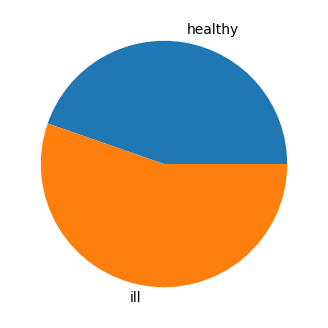

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()


vals = data_for_pl['Age']
labels = ['healthy', 'ill']
ax.pie(vals, labels=labels)

<Axes: >

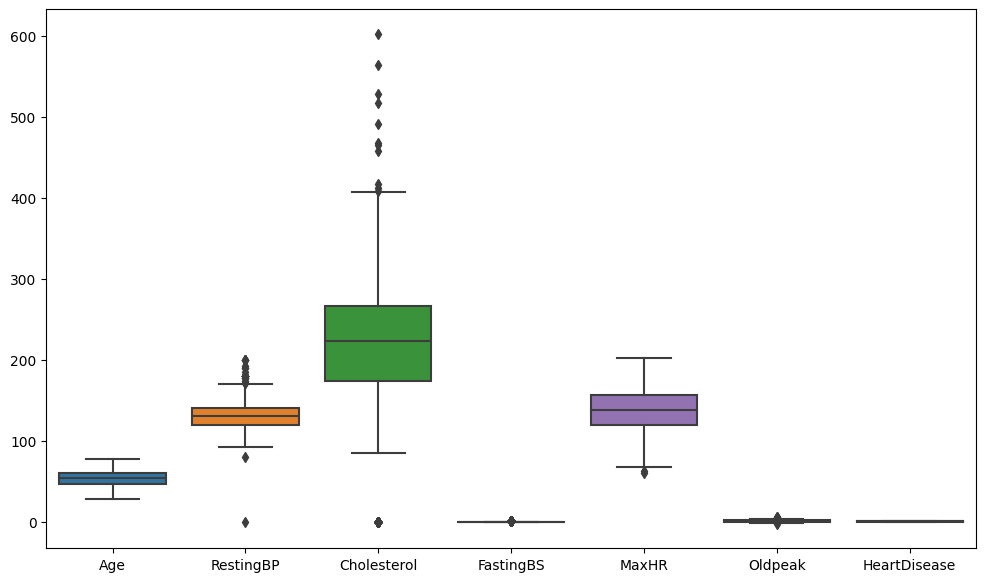

In [ ]:
#построила график ящик с усами для выявления выбросов
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 12,7


sns.boxplot(data=data_pd)

По графику видим явный выброс у показателя артериального давления RestingBP. Его можно удалить

In [ ]:
data_pd = data_pd[data_pd['RestingBP'] > 10]
data_pd

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<Axes: >

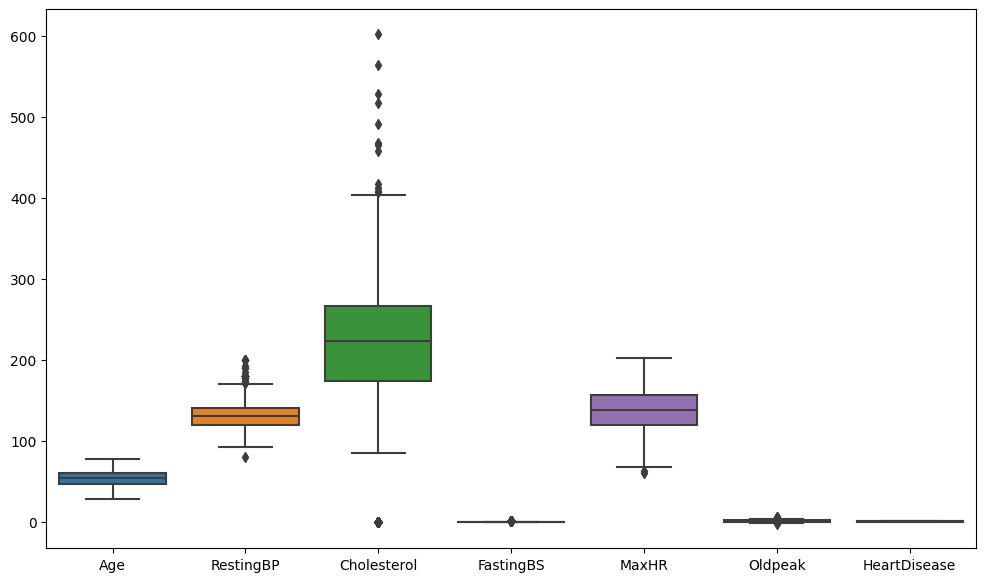

In [ ]:
sns.boxplot(data=data_pd)

In [ ]:
#отобрала названия колонок только с категориальными переменными
categorials = data_pd.select_dtypes('object').columns
categorials

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [ ]:
#преобразовала категориальные переменные в 0 и 1
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe.fit(data_pd[categorials])
data_pd[ohe.get_feature_names_out()] = ohe.transform(data_pd[categorials])
data_pd = data_pd.drop(categorials, axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
<ipython-input-35-f874ba40adf2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pd[ohe.get_feature_names_out()] = ohe.transform(data_pd[categorials])
<ipython-input-35-f874ba40adf2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_

In [ ]:
data_pd.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


3. Разделение выборки на train и test

In [ ]:
#разделила выборку на тренировочную и тестовую, выделила целевую переменную в отдельный датафрейм
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_pd.drop(columns='HeartDisease'),
                                                    data_pd['HeartDisease'],
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape

((733, 20), (184, 20))

4. Обучение дерева решений на обучающем множестве. Предсказание целевой переменной на тестовом множестве

In [ ]:
#построила модель дерева решений
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
y_pred = model1.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1])

In [ ]:
y_true = y_test

In [ ]:
from sklearn.metrics import classification_report

5. Создание случайного леса

In [ ]:
#построила модель ансамбля
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(max_depth=3, random_state=42)
model2.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

In [ ]:
y_pred2 = model2.predict(X_test)
y_pred2

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1])

In [ ]:
#сравнила результаты двух моделей
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        72
           1       0.91      0.84      0.87       112

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



In [ ]:
print(classification_report(y_true, y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81        72
           1       0.90      0.85      0.87       112

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184



Дерево решений справилось лучше ансамбля по precision. Но для нас важнее recall для 1, который лучше у ансамбля. Accuracy равны у обеих моделей.


6. Определение важности признаков для ансамбля

In [ ]:
#соединила показатели важности признаков в тип данных series и построила график для наглядности

imp = pd.Series(model2.feature_importances_)
imp

0     0.016979
1     0.006725
2     0.046800
3     0.007722
4     0.036529
5     0.107496
6     0.023843
7     0.017012
8     0.092909
9     0.009272
10    0.002585
11    0.000954
12    0.001168
13    0.000259
14    0.000745
15    0.112411
16    0.100257
17    0.006674
18    0.145349
19    0.264311
dtype: float64

In [ ]:
imp.index = pd.Series(X_train.columns)

In [ ]:
imp_sort = imp.sort_values(ascending=False)

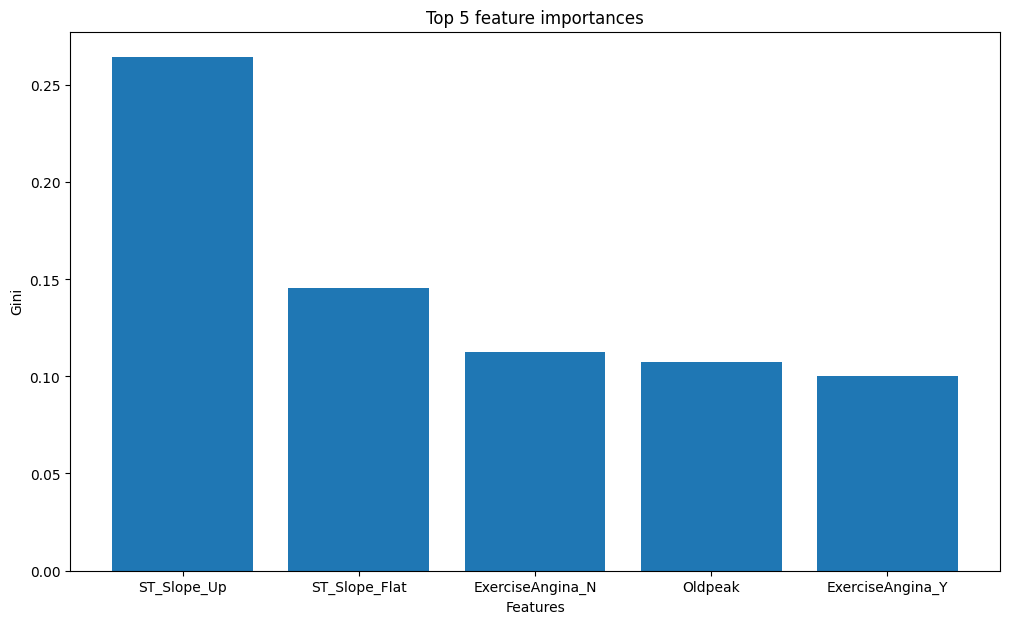

In [ ]:
plt.title('Top 5 feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp_sort.head().index, imp_sort.head())
plt.show()

Наиболее важные признаки: наклон пикового сегмента ST при нагрузке, стенокардия при физнагрузке, числовое значение депрессии

7. Обучение бэггинга над моделью дерева решений

In [ ]:
#построила беггинг
from sklearn.ensemble import BaggingClassifier

bagging1 = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=150,
                           max_samples=0.5,
                           max_features=0.5,
                           random_state=42)

In [ ]:
bagging1.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=0.5,
                  max_samples=0.5, n_estimators=150, random_state=42)

In [ ]:
y_pred3 = bagging1.predict(X_test)
y_pred3

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1])

In [ ]:
print(classification_report(y_true, y_pred3))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85        72
           1       0.90      0.91      0.91       112

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



9. Обучение стекинга трех моделей

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [
        ('dtc', DecisionTreeClassifier(max_depth=3, random_state=42)),
        ('rfc', RandomForestClassifier(n_estimators=150, max_depth=3, random_state=42)),
        ('svr', make_pipeline(StandardScaler(), LinearSVC(dual=False, random_state=42)))
]

In [ ]:
model4 = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [ ]:
model4.fit(X_train, y_train)

StackingClassifier(estimators=[('dtc',
                                DecisionTreeClassifier(max_depth=3,
                                                       random_state=42)),
                               ('rfc',
                                RandomForestClassifier(max_depth=3,
                                                       n_estimators=150,
                                                       random_state=42)),
                               ('svr',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(dual=False,
                                                           random_state=42))]))],
                   final_estimator=LogisticRegression())

In [ ]:
y_pred4 = model4.predict(X_test)
y_pred4

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1])

In [ ]:
print(classification_report(y_true, y_pred4))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        72
           1       0.92      0.88      0.89       112

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



10. Выводы

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        72
           1       0.91      0.84      0.87       112

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



In [ ]:
print(classification_report(y_true, y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81        72
           1       0.90      0.85      0.87       112

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184



In [ ]:
print(classification_report(y_true, y_pred3))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85        72
           1       0.90      0.91      0.91       112

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



In [ ]:
print(classification_report(y_true, y_pred4))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        72
           1       0.92      0.88      0.89       112

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



Показатель recall ансамбля лучше, чем дерева решений. Но при этом бэггинг справился лучше, чем обе эти модели.

Accuracy лучше у бэггинга, чем у стекинга. При этом recall для 1 тоже больше у бэггинга (в случае с медицинской диагностикой нам важнее recall).